In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from cplex import *

plt.figure(figsize=(20,10))

In [4]:
datas = [
('a', 115,61),
('b', 120,60),
('c', 125,19),
('d', 125,64),
('e', 130,64),
('f', 135,52),
('g', 215,21),
('h', 250,25),
('i', 400,63),
('j', 400,57),
('k', 400,26),
('l', 400,19),
('m', 410,61),
# ('n', 415,61),
# ('o', 425,16),
# ('p', 435,18),
# ('q', 435,23),
# ('r', 635,64),
# ('s', 645,19),
# ('t', 740,25),
# ('u', 750,25)
]

In [5]:
def make_edges(datas):
    edges = []
    for i, (name, x, y)  in enumerate(datas):
        for j in range(len(datas)):
            if i!=j:
                from_to = (name, datas[j][0])
                _x = abs(x - datas[j][1])
                _y = abs(y - datas[j][2])
                edges.append((from_to, _x + _y))
    return edges


def make_subsets(datas):
    num_of_nodes = len(datas)
    N = range(1,num_of_nodes+1)

    all_node_subsets = []
    for i in range(2**(num_of_nodes-1)+1, 2**(num_of_nodes)-1):
        list_bin =  map(int, list((bin(i)))[2:])
        node_subset = []
        for idx in range(num_of_nodes):
            if list_bin[idx]*N[idx]>0:
                node_subset.append(list_bin[idx]*N[idx])
        all_node_subsets.append(node_subset)
    return all_node_subsets

In [6]:
def formulate_tsp(edges, all_node_subsets):
    
    cplex = Cplex()

    # set sense
    cplex.objective.set_sense(cplex.objective.sense.minimize)

    #set variables
    y = ['y_%d_%d' %(i,j) for i in range(len(datas)) for j in range(len(datas)) if i!=j]

    #objective function
    c = [e[1] for e in edges]
    cplex.variables.add(obj=c, types=['B']*len(y), names=y)

    #set constraints
    #const1
    for i in range(len(datas)):
        exp = [SparsePair(ind=['y_%d_%d' %(i,j) for j in range(len(datas)) if i!=j], val=[1]*(len(datas)-1))]
        cplex.linear_constraints.add(lin_expr=exp,senses='E',rhs=[1])

    #const2
    for j in range(len(datas)):
        exp = [SparsePair(ind=['y_%d_%d' %(i,j) for i in range(len(datas)) if i!=j], val=[1]*(len(datas)-1))]
        cplex.linear_constraints.add(lin_expr=exp,senses='E',rhs=[1])

    #const3
    for node_subset in all_node_subsets:
        exp = [SparsePair(ind=['y_%d_%d' %(i-1,j-1) for i in node_subset for j in node_subset if i!=j], val=[1]*(len(node_subset)*(len(node_subset)-1)))]
        cplex.linear_constraints.add(lin_expr=exp, senses='L', rhs=[len(node_subset)-1])
    
    return cplex, y

In [7]:
def make_graph(datas,result):
    G = nx.DiGraph()

    for name, x, y in datas :
        G.add_node(name, pos=(x,y))

    # G.add_edges_from([('a','b')])
    for item in result:
        (y, i, j) = item[0].split('_')
        G.add_edge(chr(int(i)+97), chr(int(j)+97))


    pos=nx.get_node_attributes(G,'pos')
    nx.draw_networkx(G, pos)
    plt.show()

In [8]:
edges = make_edges(datas)
all_node_subsets = make_subsets(datas)
cpx,y = formulate_tsp(edges, all_node_subsets) 
cpx.solve()
print cpx.solution.get_objective_value()
result = [(yi,cpx.solution.get_values(yi)) for yi in y if cpx.solution.get_values(yi)>0]
print result



Tried aggregator 1 time.
Reduced MIP has 4120 rows, 156 columns, and 184476 nonzeros.
Reduced MIP has 156 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.06 sec. (53.30 ticks)
Probing time = 0.01 sec. (11.04 ticks)
Tried aggregator 1 time.
Reduced MIP has 4120 rows, 156 columns, and 184476 nonzeros.
Reduced MIP has 156 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.07 sec. (53.30 ticks)
Probing time = 0.04 sec. (11.46 ticks)
Clique table members: 38.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 4 threads.
Root relaxation solution time = 0.37 sec. (36.65 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

*     0+    0                         1936.0000        0.0000           100.00%
*     0     0      integral     0      712.0000      712.0000       59    0.00%
Elapsed time 

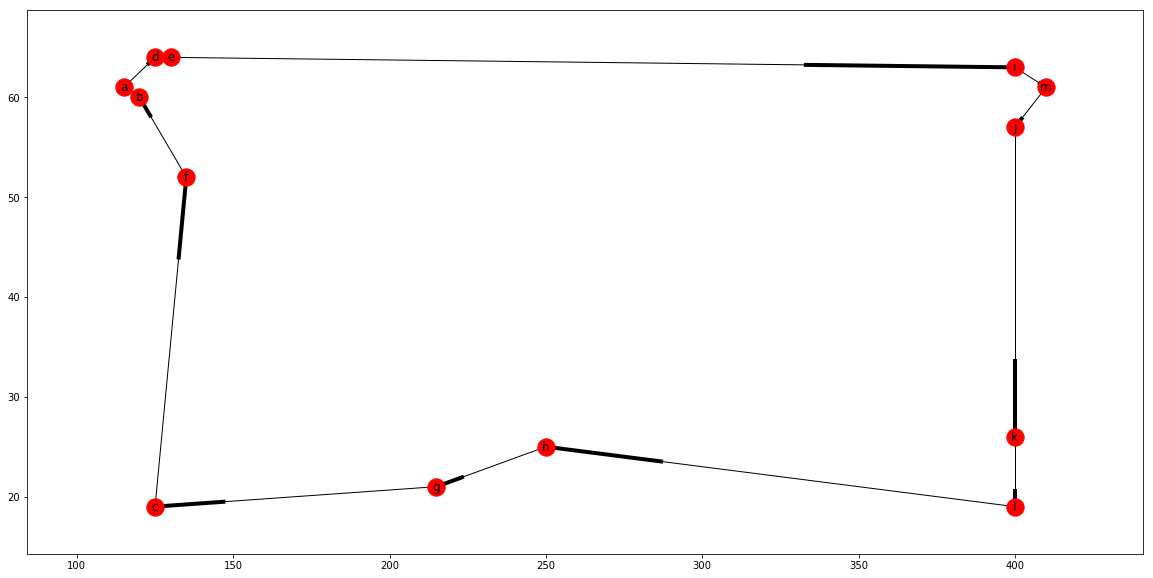

In [9]:
make_graph(datas, result)

In [11]:
a
b
f
c
g
h
l
k
j
m
i
e

a
b
f
c
g
h
l
k
j
m
i
e
